In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.base import (TransformerMixin, BaseEstimator)
from sklearn.preprocessing import ( OneHotEncoder, LabelBinarizer, LabelEncoder, StandardScaler, MinMaxScaler, MaxAbsScaler )
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import torch
import itertools
import torch.nn as nn
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from pmdarima import auto_arima
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
dataset = pd.read_csv('TE002.csv')

In [3]:
dataset.head()

,Time,Carbon Dioxide,Methane,Temperature,Humidity,Nitrous Oxide
0,4/23/2023 8:09,462.49,138.63,15.5,93,0.0563
1,4/17/2023 16:42,446.35,128.81,18.5,92,0.0516
2,4/14/2023 5:18,455.66,128.34,15.72,98,0.0547
3,4/13/2023 12:08,442.92,128.25,20.62,82,0.0575
4,4/12/2023 18:13,421.08,139.52,19,94,0.0568


In [4]:
dataset_statistics = dataset.describe()

In [5]:
dataset_statistics

,Nitrous Oxide
count,89751.000000
mean,0.186625
std,0.375265
min,0.000000
25%,0.000000
50%,0.000000
75%,0.055700
max,1.000000


In [6]:
# check for null values
total = dataset.isnull().sum().sort_values(ascending=False)
percent = round(dataset.isnull().sum()/dataset.isnull().count()*100,2).sort_values(ascending = False)
pd.concat([total,percent],axis=1,keys=['Total', 'Percent']).transpose()

,Temperature,Humidity,Time,Carbon Dioxide,Methane,Nitrous Oxide
Total,7.00,7.00,0.0,0.0,0.0,0.0
Percent,0.01,0.01,0.0,0.0,0.0,0.0


In [7]:
dataset = dataset.dropna()

In [10]:
dataset.head()

,Time,Carbon Dioxide,Methane,Temperature,Humidity,Nitrous Oxide
0,4/23/2023 8:09,462.49,138.63,15.5,93,0.0563
1,4/17/2023 16:42,446.35,128.81,18.5,92,0.0516
2,4/14/2023 5:18,455.66,128.34,15.72,98,0.0547
3,4/13/2023 12:08,442.92,128.25,20.62,82,0.0575
4,4/12/2023 18:13,421.08,139.52,19,94,0.0568


In [11]:
# Assuming 'df' is your DataFrame
dataset['Carbon Dioxide'] = dataset['Carbon Dioxide'].astype(str).str.replace(',', '').astype(float)
dataset['Methane'] = dataset['Methane'].astype(str).str.replace(',', '').astype(float)
dataset['Temperature'] = dataset['Temperature'].astype(str).str.replace(',', '').astype(float)
dataset['Humidity'] = dataset['Humidity'].astype(str).str.replace(',', '').astype(float)

In [12]:
dataset_date_time = dataset[['Time']]

In [13]:
dataset_date_time = dataset_date_time.reset_index()

In [14]:
dataset_date_time

,index,Time
0,0,4/23/2023 8:09
1,1,4/17/2023 16:42
2,2,4/14/2023 5:18
3,3,4/13/2023 12:08
4,4,4/12/2023 18:13
...,...,...
89739,89746,1/1/2024 3:00
89740,89747,1/1/2024 3:00
89741,89748,1/1/2024 3:00
89742,89749,1/1/2024 3:00


In [15]:
dataset = dataset.reset_index()

In [16]:
dataset

,index,Time,Carbon Dioxide,Methane,Temperature,Humidity,Nitrous Oxide
0,0,4/23/2023 8:09,462.49,138.63,15.50,93.0,0.0563
1,1,4/17/2023 16:42,446.35,128.81,18.50,92.0,0.0516
2,2,4/14/2023 5:18,455.66,128.34,15.72,98.0,0.0547
3,3,4/13/2023 12:08,442.92,128.25,20.62,82.0,0.0575
4,4,4/12/2023 18:13,421.08,139.52,19.00,94.0,0.0568
...,...,...,...,...,...,...,...
89739,89746,1/1/2024 3:00,417.00,1502.00,24.00,85.0,1.0000
89740,89747,1/1/2024 3:00,414.00,1504.00,24.00,80.0,1.0000
89741,89748,1/1/2024 3:00,417.00,1500.00,24.00,84.0,1.0000
89742,89749,1/1/2024 3:00,408.00,1490.00,24.00,82.0,1.0000


In [17]:
dataset = dataset.drop(['Time'], axis=1)

In [18]:
dataset.shape

(89744, 6)

In [19]:
dataset.shape

(89744, 6)

In [20]:
dataset.head()

,index,Carbon Dioxide,Methane,Temperature,Humidity,Nitrous Oxide
0,0,462.49,138.63,15.50,93.0,0.0563
1,1,446.35,128.81,18.50,92.0,0.0516
2,2,455.66,128.34,15.72,98.0,0.0547
3,3,442.92,128.25,20.62,82.0,0.0575
4,4,421.08,139.52,19.00,94.0,0.0568


In [21]:
dataset.columns

Index(['index', 'Carbon Dioxide', 'Methane', 'Temperature', 'Humidity',
       'Nitrous Oxide'],
      dtype='object')

In [22]:
class ShowOutliers(BaseEstimator, TransformerMixin):
    def __init__(self, columns, columns_per_row=4):
        self.columns = columns
        self.columns_per_row = columns_per_row

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        num_plots = len(self.columns)
        num_rows = (num_plots + self.columns_per_row - 1) // self.columns_per_row

        fig, axes = plt.subplots(figsize=(20, 5 * num_rows), nrows=num_rows, ncols=self.columns_per_row)

        for i, column in enumerate(self.columns):
            row_idx = i // self.columns_per_row
            col_idx = i % self.columns_per_row

            sns.set_style('whitegrid')
            axes[row_idx, col_idx].grid(False)
            sns.boxplot(X[column], ax=axes[row_idx, col_idx])
            axes[row_idx, col_idx].set_xticklabels([column])

        plt.show()

In [23]:
show_outliers = ShowOutliers(dataset.columns)

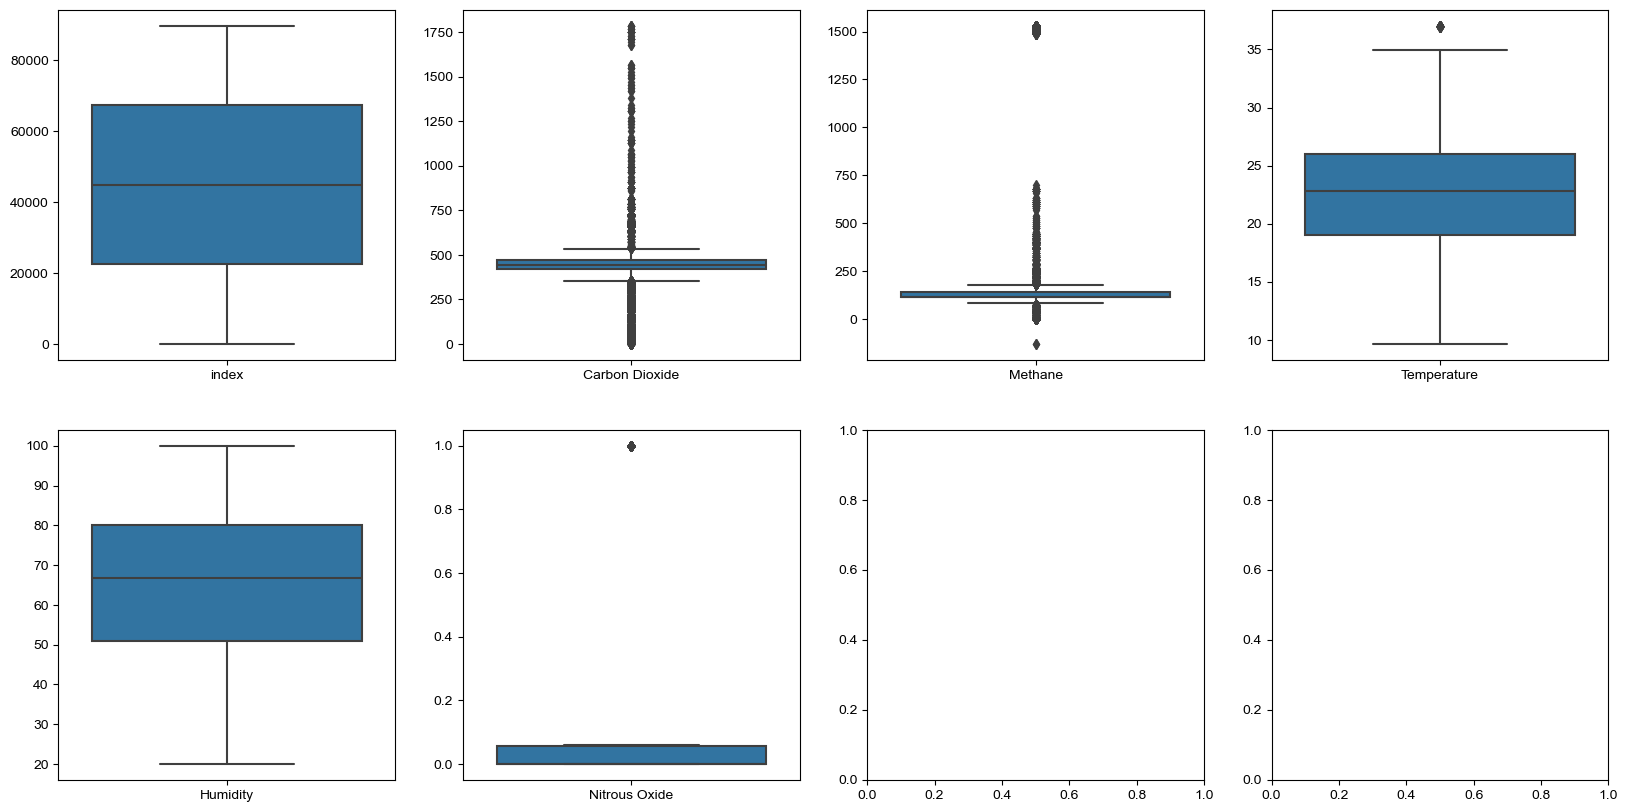

In [24]:
show_outliers.fit_transform(dataset)

In [25]:
#remove outliers
class RemoveOutliers(BaseEstimator,TransformerMixin):
    def __init__(self,columns):
        self.columns = columns
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        for i in self.columns:
            iqr = X[i].quantile(0.75) - X[i].quantile(0.25)
            high_q = X[X[i]>X[i].quantile(0.75)+iqr*1.5]
            low_q = X[X[i]<X[i].quantile(0.25)-iqr*1.5]
            X = X.drop(high_q.index)
            X = X.drop(low_q.index)
        return X

In [26]:
remove_outliers = RemoveOutliers(dataset.columns)

In [27]:
no_outliers_data = remove_outliers.fit_transform(dataset)

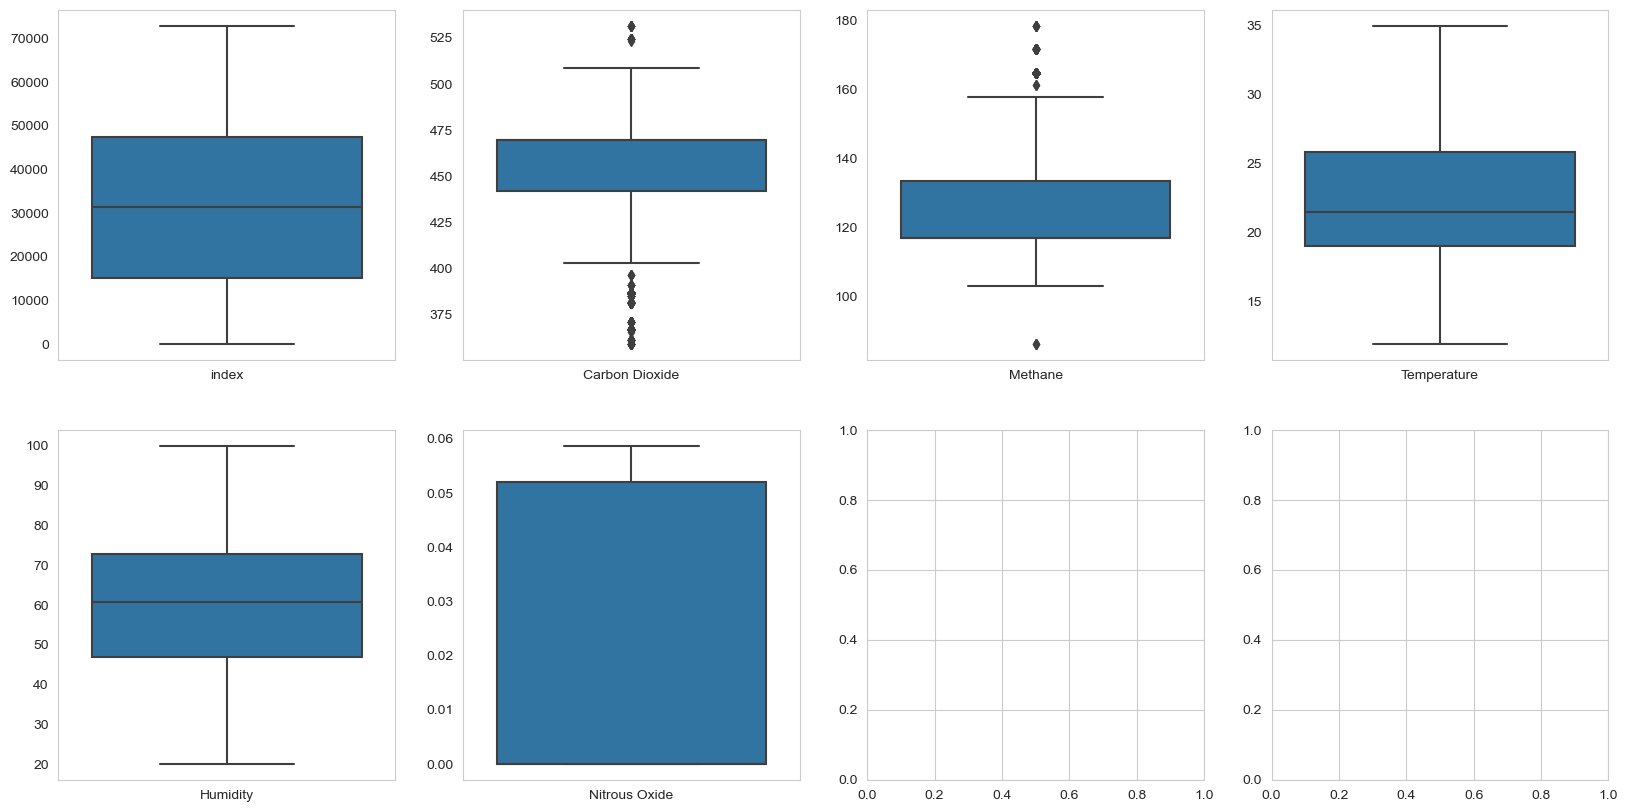

In [28]:
show_outliers.fit_transform(no_outliers_data)

In [29]:
no_outliers_data.shape

(60495, 6)

In [30]:
no_outliers_data

,index,Carbon Dioxide,Methane,Temperature,Humidity,Nitrous Oxide
0,0,462.49,138.63,15.50,93.0,0.0563
1,1,446.35,128.81,18.50,92.0,0.0516
2,2,455.66,128.34,15.72,98.0,0.0547
3,3,442.92,128.25,20.62,82.0,0.0575
4,4,421.08,139.52,19.00,94.0,0.0568
...,...,...,...,...,...,...
72807,72809,396.37,139.78,18.40,68.2,0.0000
72808,72810,425.74,129.03,18.50,68.0,0.0000
72809,72811,425.74,129.03,18.30,68.3,0.0000
72811,72813,523.42,129.03,18.80,66.7,0.0000


In [31]:
data = pd.merge(dataset_date_time, no_outliers_data, how='inner')

In [32]:
data.shape

(60495, 7)

In [33]:
data

,index,Time,Carbon Dioxide,Methane,Temperature,Humidity,Nitrous Oxide
0,0,4/23/2023 8:09,462.49,138.63,15.50,93.0,0.0563
1,1,4/17/2023 16:42,446.35,128.81,18.50,92.0,0.0516
2,2,4/14/2023 5:18,455.66,128.34,15.72,98.0,0.0547
3,3,4/13/2023 12:08,442.92,128.25,20.62,82.0,0.0575
4,4,4/12/2023 18:13,421.08,139.52,19.00,94.0,0.0568
...,...,...,...,...,...,...,...
60490,72809,7/29/2023 20:37,396.37,139.78,18.40,68.2,0.0000
60491,72810,7/29/2023 20:36,425.74,129.03,18.50,68.0,0.0000
60492,72811,7/29/2023 20:34,425.74,129.03,18.30,68.3,0.0000
60493,72813,7/29/2023 20:32,523.42,129.03,18.80,66.7,0.0000


In [34]:
data = data.drop(['index'], axis=1)

In [35]:
data

,Time,Carbon Dioxide,Methane,Temperature,Humidity,Nitrous Oxide
0,4/23/2023 8:09,462.49,138.63,15.50,93.0,0.0563
1,4/17/2023 16:42,446.35,128.81,18.50,92.0,0.0516
2,4/14/2023 5:18,455.66,128.34,15.72,98.0,0.0547
3,4/13/2023 12:08,442.92,128.25,20.62,82.0,0.0575
4,4/12/2023 18:13,421.08,139.52,19.00,94.0,0.0568
...,...,...,...,...,...,...
60490,7/29/2023 20:37,396.37,139.78,18.40,68.2,0.0000
60491,7/29/2023 20:36,425.74,129.03,18.50,68.0,0.0000
60492,7/29/2023 20:34,425.74,129.03,18.30,68.3,0.0000
60493,7/29/2023 20:32,523.42,129.03,18.80,66.7,0.0000


In [36]:
data['Date_Time'] = pd.to_datetime(data['Time']) 

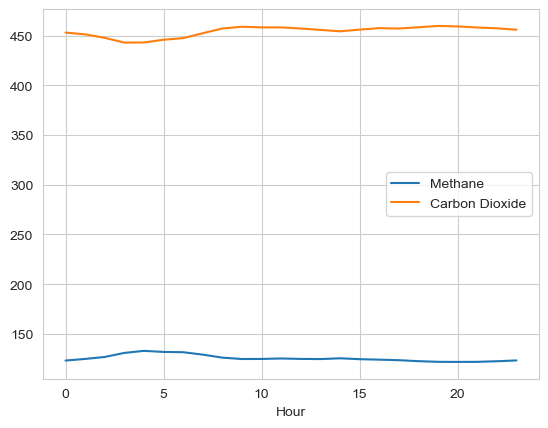

In [37]:
data['Hour'] = pd.to_datetime(data['Date_Time']).dt.hour
methane_trend_over_day = data.groupby('Hour')['Methane'].mean().plot(kind='line')
data['Hour'] = pd.to_datetime(data['Date_Time']).dt.hour
methane_trend_over_day = data.groupby('Hour')['Carbon Dioxide'].mean().plot(kind='line')
plt.legend(['Methane','Carbon Dioxide'])

In [38]:
data

,Time,Carbon Dioxide,Methane,Temperature,Humidity,Nitrous Oxide,Date_Time,Hour
0,4/23/2023 8:09,462.49,138.63,15.50,93.0,0.0563,2023-04-23 08:09:00,8
1,4/17/2023 16:42,446.35,128.81,18.50,92.0,0.0516,2023-04-17 16:42:00,16
2,4/14/2023 5:18,455.66,128.34,15.72,98.0,0.0547,2023-04-14 05:18:00,5
3,4/13/2023 12:08,442.92,128.25,20.62,82.0,0.0575,2023-04-13 12:08:00,12
4,4/12/2023 18:13,421.08,139.52,19.00,94.0,0.0568,2023-04-12 18:13:00,18
...,...,...,...,...,...,...,...,...
60490,7/29/2023 20:37,396.37,139.78,18.40,68.2,0.0000,2023-07-29 20:37:00,20
60491,7/29/2023 20:36,425.74,129.03,18.50,68.0,0.0000,2023-07-29 20:36:00,20
60492,7/29/2023 20:34,425.74,129.03,18.30,68.3,0.0000,2023-07-29 20:34:00,20
60493,7/29/2023 20:32,523.42,129.03,18.80,66.7,0.0000,2023-07-29 20:32:00,20


In [39]:
# Preprocess the data
data['Date_Time'] = pd.to_datetime(data['Date_Time'])
data.set_index('Date_Time', inplace=True)
data.sort_index(inplace=True)

In [40]:
# Check for missing values
print(data.isnull().sum())

Time                 0
Carbon Dioxide       0
Methane              0
Temperature        545
Humidity          1242
Nitrous Oxide        0
Hour                 0
dtype: int64


In [41]:
# Fill or drop missing values
data = data.dropna()

In [42]:
data

,Time,Carbon Dioxide,Methane,Temperature,Humidity,Nitrous Oxide,Hour
Date_Time,,,,,,,
2023-04-01 22:50:00,4/1/2023 22:50,460.56,130.75,16.12,98.0,0.0573,22
2023-04-02 08:43:00,4/2/2023 8:43,422.08,136.08,16.42,95.0,0.0543,8
2023-04-02 17:38:00,4/2/2023 17:38,463.62,129.85,20.62,87.0,0.0545,17
2023-04-03 07:40:00,4/3/2023 7:40,429.00,131.28,14.21,97.0,0.0528,7
2023-04-03 17:57:00,4/3/2023 17:57,420.03,142.40,20.58,88.0,0.0541,17
...,...,...,...,...,...,...,...
2024-03-20 06:39:00,3/20/2024 6:39,422.67,135.05,15.80,98.0,0.0533,6
2024-03-22 03:12:00,3/22/2024 3:12,458.05,139.41,16.18,99.0,0.0514,3
2024-03-22 03:22:00,3/22/2024 3:22,430.30,128.81,16.20,99.0,0.0547,3


In [43]:
#GRU

### Explanation of `add_features` Function

1. **Lag Features (`CO2_lag1`, `CO2_lag2`)**:
    - **`data['CO2_lag1']`**: This creates a new feature that contains the value of "Carbon Dioxide" from the previous time step (lag of 1). The `shift(1)` method shifts the values down by one row, so the value at any given time step `t` is now the value from time step `t-1`.
    - **`data['CO2_lag2']`**: Similarly, this creates a feature with a lag of 2, meaning it contains the value of "Carbon Dioxide" from two time steps prior (shifted down by two rows).

2. **Moving Average Feature (`CO2_ma7`)**:
    - **`data['CO2_ma7']`**: This creates a new feature that represents the 7-day moving average of the "Carbon Dioxide" values. The `rolling(window=7).mean()` method calculates the mean of the values over a rolling window of size 7. This smooths out short-term fluctuations and highlights longer-term trends.


### Purpose

The purpose of this feature engineering is to provide additional information to the machine learning model. By including lag features, the model can learn from past values of "Carbon Dioxide" to make predictions. The moving average feature helps the model understand the trend of "Carbon Dioxide" over a week, which can be particularly useful in time series forecasting.


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

In [45]:
# Convert date to numeric values (if 'date' is a column and not the index)
# If 'date' is the index, ensure it's not being considered as part of the data
if data.index.name == 'date':
    data['timestamp'] = data.index.astype(np.int64) // 10**9
    data = data.drop(columns='timestamp')  # Drop the timestamp column if it was added

In [46]:
# Drop non-numeric columns if any are found
data = data.select_dtypes(include=[np.number])

In [47]:
# Feature engineering
def add_features(data):
    data['CO2_lag1'] = data['Carbon Dioxide'].shift(1)
    data['CO2_lag2'] = data['Carbon Dioxide'].shift(2)
    data['CO2_ma7'] = data['Carbon Dioxide'].rolling(window=7).mean()
    data = data.dropna()
    return data

data = add_features(data)

In [48]:
data.head()

,Carbon Dioxide,Methane,Temperature,Humidity,Nitrous Oxide,Hour,CO2_lag1,CO2_lag2,CO2_ma7
Date_Time,,,,,,,,,
2023-04-09 11:49:00,451.05,131.34,22.08,75.0,0.0567,11,452.77,420.03,442.730000
2023-04-09 23:11:00,424.01,142.34,16.70,98.0,0.0567,23,451.05,452.77,437.508571
2023-04-12 08:59:00,450.04,131.31,16.78,95.0,0.0508,8,424.01,451.05,441.502857
2023-04-12 18:13:00,421.08,139.52,19.00,94.0,0.0568,18,450.04,424.01,435.425714
2023-04-13 12:08:00,442.92,128.25,20.62,82.0,0.0575,12,421.08,450.04,437.414286


In [49]:
# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [50]:
# Split the data into training and test sets
train_size = int(len(scaled_data) * 0.8)
train, test = scaled_data[:train_size], scaled_data[train_size:]

In [51]:
# Prepare the input and output sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length, -1])  # Assume the last column is the target
    return np.array(X), np.array(y)

seq_length = 10
X_train, y_train = create_sequences(train, seq_length)
X_test, y_test = create_sequences(test, seq_length)

In [52]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Define the model creation function
def create_lstm_model(optimizer='adam', units=50, dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(units=units, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mse')
    return model


In [53]:
# Function to train and evaluate the model
def train_and_evaluate_model(units, dropout_rate, optimizer):
    model = create_lstm_model(optimizer=optimizer, units=units, dropout_rate=dropout_rate)
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=32, verbose=1)
    
    # Get the predictions
    lstm_predictions = model.predict(X_test)
    
    # Rescale the predictions and test values
    # Predictions should have shape (n_samples, 1) and we need to rescale them properly
    lstm_predictions_rescaled = scaler.inverse_transform(np.hstack((np.zeros((lstm_predictions.shape[0], data.shape[1]-1)), lstm_predictions)))
    y_test_rescaled = scaler.inverse_transform(np.hstack((np.zeros((y_test.shape[0], data.shape[1]-1)), y_test.reshape(-1, 1))))
    
    # Evaluate the model
    lstm_mse = mean_squared_error(y_test_rescaled[:, -1], lstm_predictions_rescaled[:, -1])
    lstm_mae = mean_absolute_error(y_test_rescaled[:, -1], lstm_predictions_rescaled[:, -1])
    lstm_rmse = np.sqrt(lstm_mse)
    lstm_r2 = r2_score(y_test_rescaled[:, -1], lstm_predictions_rescaled[:, -1])
    
    return lstm_mse, lstm_mae, lstm_rmse, lstm_r2, history

In [54]:
# Define hyperparameters to test
units_list = [50, 100, 150]
dropout_rates = [0.2, 0.3, 0.4]
optimizers = ['adam', 'rmsprop']

In [ ]:
# Grid search over hyperparameters
best_params = None
best_score = float('inf')
best_metrics = None
for units in units_list:
    for dropout_rate in dropout_rates:
        for optimizer in optimizers:
            print(f"Testing units={units}, dropout_rate={dropout_rate}, optimizer={optimizer}")
            mse, mae, rmse, r2, history = train_and_evaluate_model(units, dropout_rate, optimizer)
            if mse < best_score:
                best_score = mse
                best_params = (units, dropout_rate, optimizer)
                best_metrics = (mse, mae, rmse, r2)

Testing units=50, dropout_rate=0.2, optimizer=adam
Epoch 1/30
1481/1481 [==============================] - 17s 9ms/step - loss: 0.0045 - val_loss: 5.3113e-04
Epoch 2/30
1481/1481 [==============================] - 12s 8ms/step - loss: 0.0014 - val_loss: 2.7735e-04
Epoch 3/30
1481/1481 [==============================] - 13s 9ms/step - loss: 6.6767e-04 - val_loss: 4.0069e-04
Epoch 4/30
1481/1481 [==============================] - 13s 9ms/step - loss: 3.1642e-04 - val_loss: 2.3405e-04
Epoch 5/30
1481/1481 [==============================] - 17s 11ms/step - loss: 2.0932e-04 - val_loss: 2.5478e-04
Epoch 6/30
1481/1481 [==============================] - 15s 10ms/step - loss: 1.8377e-04 - val_loss: 3.3151e-04
Epoch 7/30
1481/1481 [==============================] - 16s 11ms/step - loss: 1.7885e-04 - val_loss: 1.8537e-04
Epoch 8/30
1481/1481 [==============================] - 16s 11ms/step - loss: 1.6774e-04 - val_loss: 1.9798e-04
Epoch 9/30
 987/1481 [==================>...........] - ETA: 5s -

In [ ]:
print(f"Best Parameters: units={best_params[0]}, dropout_rate={best_params[1]}, optimizer={best_params[2]}")
print(f"Best Metrics: MSE={best_metrics[0]}, MAE={best_metrics[1]}, RMSE={best_metrics[2]}, R2={best_metrics[3]}")

In [ ]:
# Train final model with best parameters
best_units, best_dropout_rate, best_optimizer = best_params
best_lstm_model = create_lstm_model(optimizer=best_optimizer, units=best_units, dropout_rate=best_dropout_rate)
history = best_lstm_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)

In [ ]:
# Plot the loss history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss History')
plt.legend()
plt.show()

In [ ]:
# Get the predictions
lstm_predictions = best_lstm_model.predict(X_test)

In [ ]:
# Rescale the predictions and test values
lstm_predictions_rescaled = scaler.inverse_transform(np.hstack((np.zeros((lstm_predictions.shape[0], data.shape[1]-1)), lstm_predictions)))
y_test_rescaled = scaler.inverse_transform(np.hstack((np.zeros((y_test.shape[0], data.shape[1]-1)), y_test.reshape(-1, 1))))

In [ ]:
# Evaluate the model
lstm_mse = mean_squared_error(y_test_rescaled[:, -1], lstm_predictions_rescaled[:, -1])
lstm_mae = mean_absolute_error(y_test_rescaled[:, -1], lstm_predictions_rescaled[:, -1])
lstm_rmse = np.sqrt(lstm_mse)
lstm_r2 = r2_score(y_test_rescaled[:, -1], lstm_predictions_rescaled[:, -1])

In [ ]:
print("Final LSTM Model:")
print(f'MSE: {lstm_mse}')
print(f'MAE: {lstm_mae}')
print(f'RMSE: {lstm_rmse}')
print(f'R2: {lstm_r2}')

In [ ]:
# Get the dates corresponding to the test set
test_dates = data.index[-len(y_test_rescaled):]

In [ ]:
# Plot the results with date labels on the y-axis
plt.plot(test_dates, y_test_rescaled[:, -1], label='True Values')
plt.plot(test_dates, lstm_predictions_rescaled[:, -1], label='Forecasting')
plt.xlabel('Date')
plt.ylabel('CO2 Concentration')
plt.title('LSTM Model Forecasting')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()
